# Predicting California House Prices 

## Data Loading & Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
houses = pd.read_csv('housing.csv')
data = houses.copy()
houses

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
houses.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
houses.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

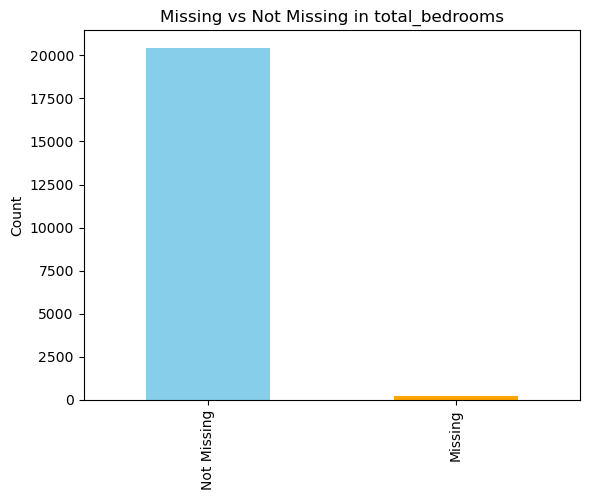

In [5]:
# Show the count of missing vs non-missing values as a bar chart
missing_count = houses['total_bedrooms'].isna().value_counts()
missing_count.index = ['Not Missing', 'Missing']
missing_count.plot(kind='bar', color=['skyblue', 'orange'])
plt.ylabel('Count')
plt.title('Missing vs Not Missing in total_bedrooms')
plt.show()

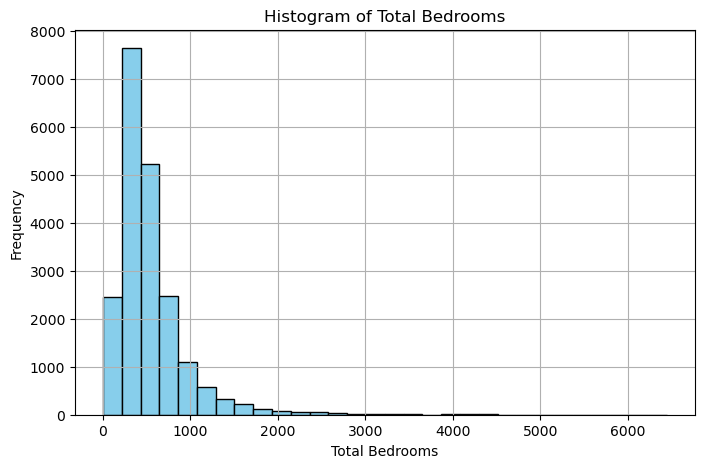

In [6]:
# Bar chart of median_house_value mean grouped by missingness in total_bedrooms, without adding a new column
plt.figure(figsize=(8, 5))
houses['total_bedrooms'].hist(bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Total Bedrooms')
plt.ylabel('Frequency')
plt.title('Histogram of Total Bedrooms')
plt.show()


In [7]:
houses['total_bedrooms'] = houses['total_bedrooms'].fillna(houses['total_bedrooms'].median())
# Log transform to fix skewness
houses['total_bedrooms_log'] = np.log1p(houses['total_bedrooms'])

In [8]:
houses.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
total_bedrooms_log    0
dtype: int64

In [9]:
# Select only numerical columns from the houses DataFrame
houses_numeric = houses.select_dtypes(include=[np.number])
houses_numeric = houses_numeric.drop(columns=['median_house_value'])
houses_numeric.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,total_bedrooms_log
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,4.867534
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,7.009409
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,5.252273
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.463832
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,5.638355


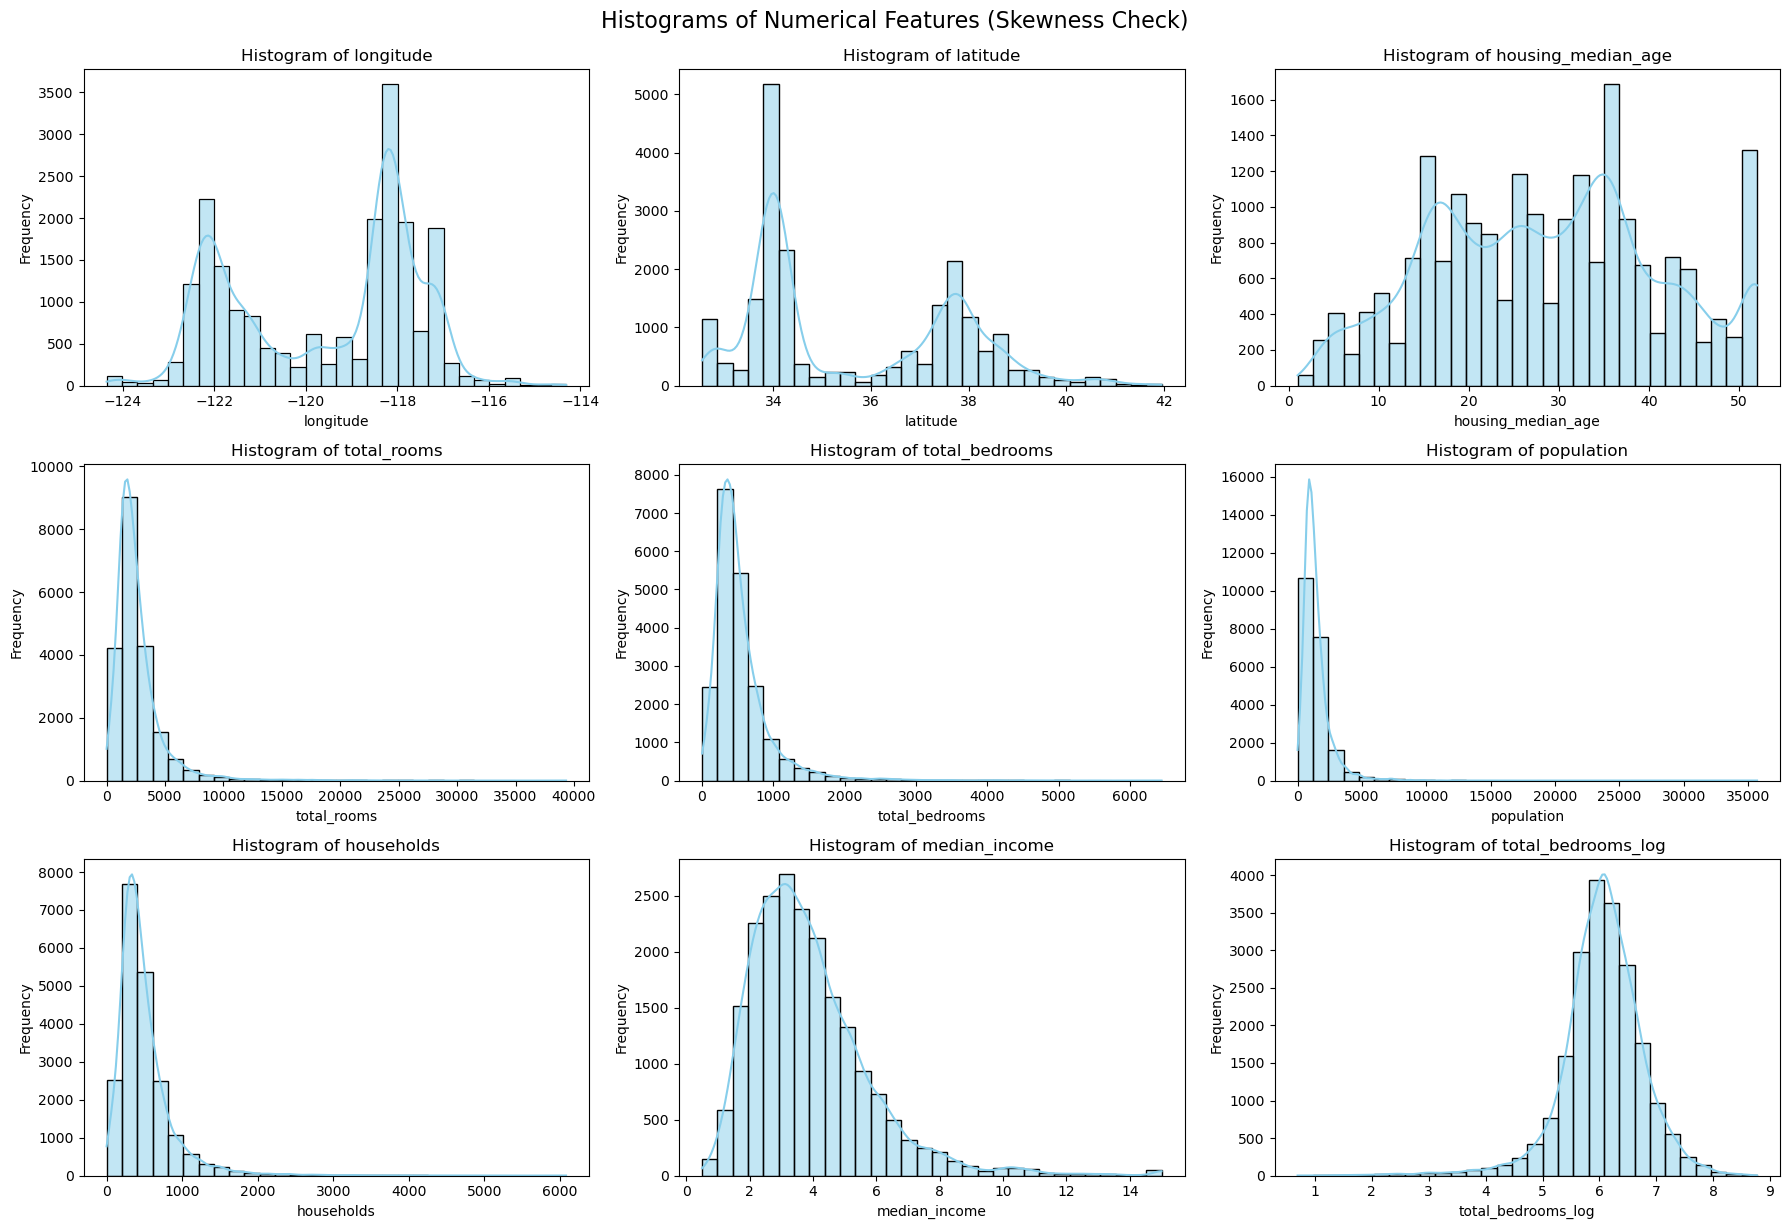

In [10]:
# Visualize the relationship between each numerical feature and the target variable
# Show histograms for each numerical feature to understand skewness
num_cols = [col for col in houses_numeric.columns if col != 'median_house_value']
plt.figure(figsize=(18, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(houses_numeric[col], bins=30, kde=True, color='skyblue')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.tight_layout()
plt.suptitle('Histograms of Numerical Features (Skewness Check)', y=1.02, fontsize=16)
plt.show()

In [11]:
houses_numeric.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'total_bedrooms_log'],
      dtype='object')

In [12]:
cols_to_log = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
houses[cols_to_log] = houses[cols_to_log].apply(lambda x: np.log1p(x))

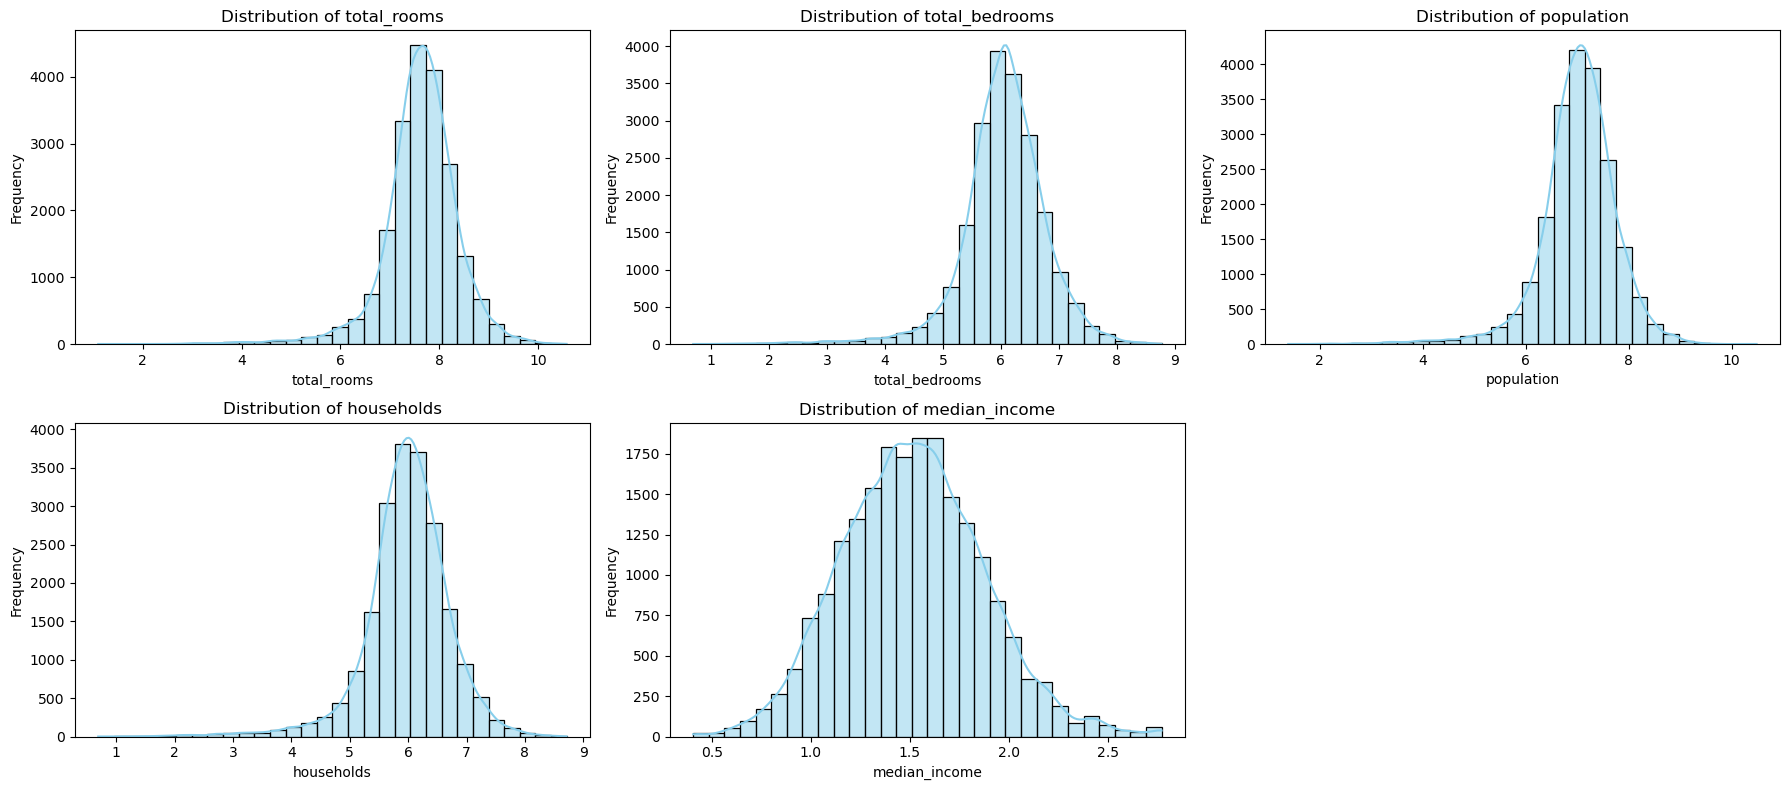

In [13]:
# Visualize the distribution of each column in houses for the specified columns
cols_to_plot = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
plt.figure(figsize=(18, 8))
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(houses[col], bins=30, kde=True, color='skyblue')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

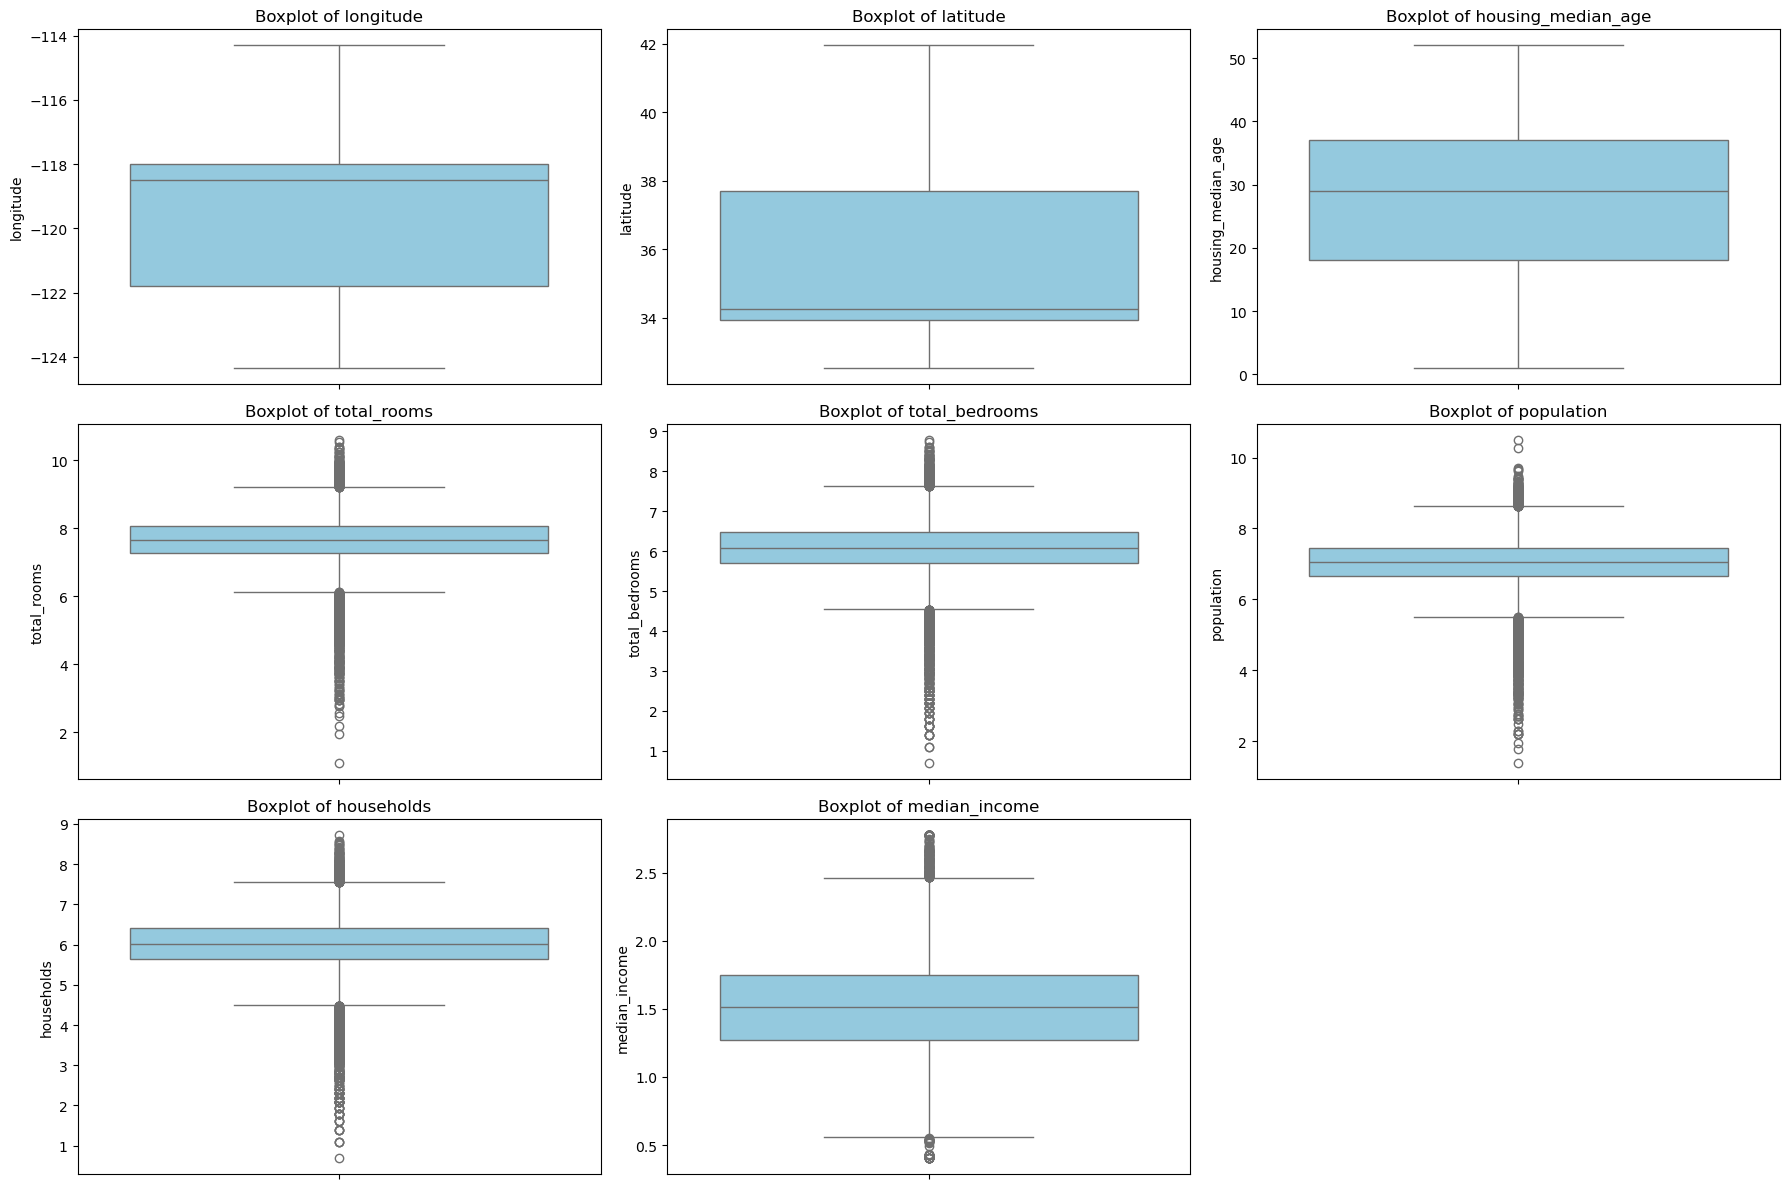

In [14]:
# Create separate boxplots for each numerical column
num_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
            'total_bedrooms', 'population', 'households', 'median_income']

plt.figure(figsize=(18, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=houses[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [15]:
# Fix outliers in specified columns of the houses DataFrame using the IQR method (in-place)
def fix_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound,
                           np.where(df[col] > upper_bound, upper_bound, df[col]))

cols_to_fix = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
fix_outliers_iqr(houses, cols_to_fix)


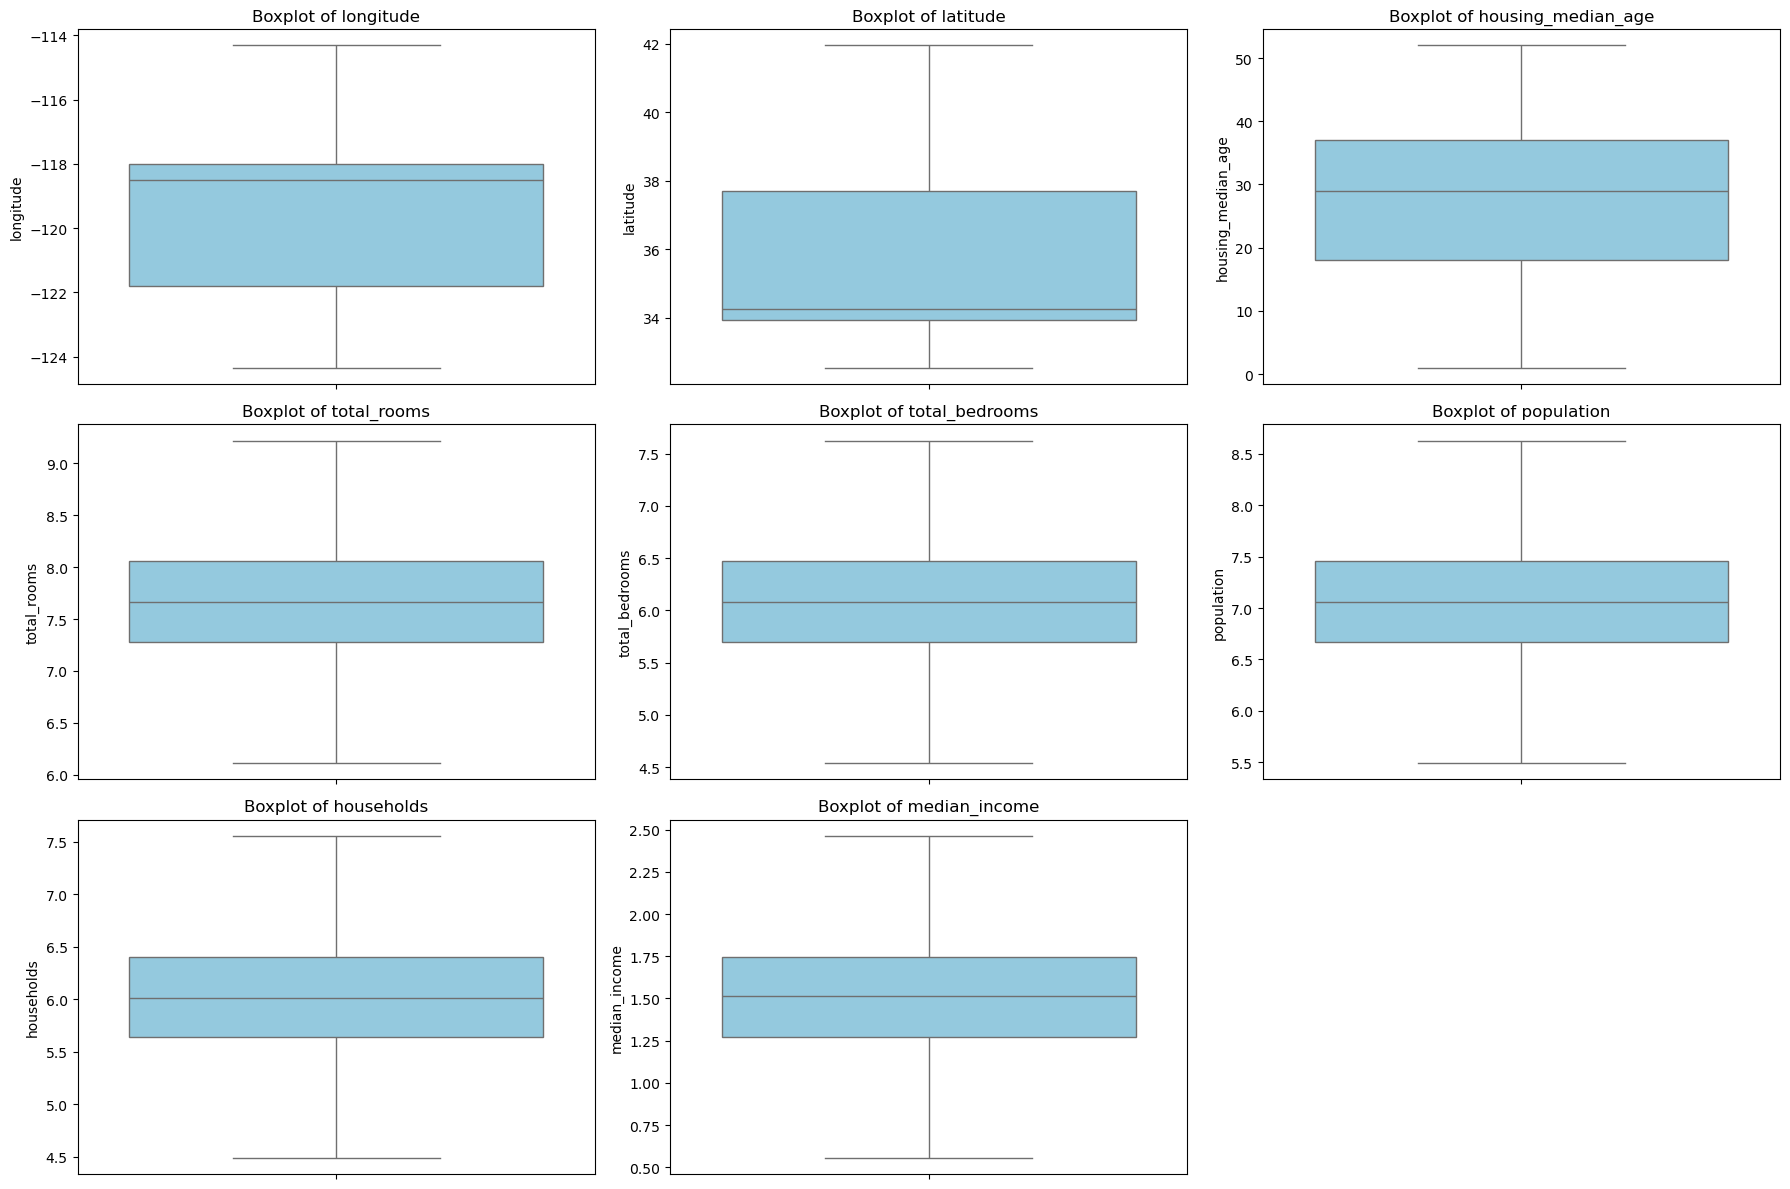

In [16]:
plt.figure(figsize=(18, 12))
for idx, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, idx)
    sns.boxplot(y=houses[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [17]:
# Select only categorical columns from the houses DataFrame
houses_categorical = houses.select_dtypes(include=['object'])
houses_categorical.head()

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY


In [18]:
for col in houses_categorical.columns:
    print(f"Unique values in '{col}': {houses_categorical[col].unique()}")

Unique values in 'ocean_proximity': ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [19]:
category_percentages = houses_categorical['ocean_proximity'].value_counts(normalize=True) * 100
print(category_percentages)

ocean_proximity
<1H OCEAN     44.263566
INLAND        31.739341
NEAR OCEAN    12.877907
NEAR BAY      11.094961
ISLAND         0.024225
Name: proportion, dtype: float64


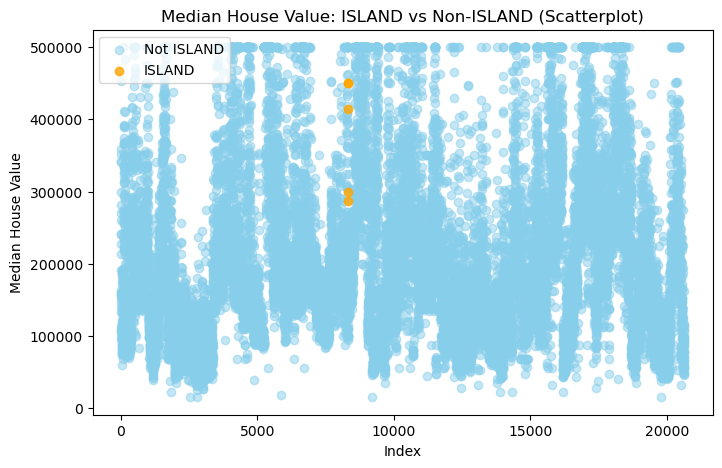

In [20]:
# Visualize the relation of 'ISLAND' with median house value using a scatterplot
plt.figure(figsize=(8, 5))
is_island = houses['ocean_proximity'] == 'ISLAND'
plt.scatter(
    houses.loc[~is_island].index, houses.loc[~is_island, 'median_house_value'],
    color='skyblue', alpha=0.5, label='Not ISLAND'
)
plt.scatter(
    houses.loc[is_island].index, houses.loc[is_island, 'median_house_value'],
    color='orange', alpha=0.8, label='ISLAND'
)
plt.xlabel('Index')
plt.ylabel('Median House Value')
plt.title('Median House Value: ISLAND vs Non-ISLAND (Scatterplot)')
plt.legend()
plt.show()

In [26]:
# Convert 'ocean_proximity' to one-hot encoded columns and join to houses DataFrame
houses = pd.concat([houses, pd.get_dummies(houses['ocean_proximity'], prefix='ocean_proximity')], axis=1)

In [27]:
houses

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedrooms_log,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,2.232720,452600.0,NEAR BAY,4.867534,False,False,False,True,False
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,2.230165,358500.0,NEAR BAY,7.009409,False,False,False,True,False
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,2.111110,352100.0,NEAR BAY,5.252273,False,False,False,True,False
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,1.893579,341300.0,NEAR BAY,5.463832,False,False,False,True,False
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,1.578195,342200.0,NEAR BAY,5.638355,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,0.940124,78100.0,INLAND,5.926926,False,True,False,False,False
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,1.268861,77100.0,INLAND,5.017280,False,True,False,False,False
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,0.993252,92300.0,INLAND,6.186209,False,True,False,False,False
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.053336,84700.0,INLAND,6.016157,False,True,False,False,False


In [29]:
# Convert boolean columns to integers (0/1) for one-hot encoded columns
bool_cols = [col for col in houses.columns if col.startswith('ocean_proximity_')]
houses[bool_cols] = houses[bool_cols].astype(int)

In [30]:
houses

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedrooms_log,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,2.232720,452600.0,NEAR BAY,4.867534,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,2.230165,358500.0,NEAR BAY,7.009409,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,2.111110,352100.0,NEAR BAY,5.252273,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,1.893579,341300.0,NEAR BAY,5.463832,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,1.578195,342200.0,NEAR BAY,5.638355,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,0.940124,78100.0,INLAND,5.926926,0,1,0,0,0
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,1.268861,77100.0,INLAND,5.017280,0,1,0,0,0
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,0.993252,92300.0,INLAND,6.186209,0,1,0,0,0
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.053336,84700.0,INLAND,6.016157,0,1,0,0,0


In [31]:
houses = houses.drop(columns=['ocean_proximity_ISLAND','ocean_proximity','total_bedrooms_log'])

In [32]:
houses

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,2.232720,452600.0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,2.230165,358500.0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,2.111110,352100.0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,1.893579,341300.0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,1.578195,342200.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,0.940124,78100.0,0,1,0,0
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,1.268861,77100.0,0,1,0,0
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,0.993252,92300.0,0,1,0,0
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.053336,84700.0,0,1,0,0


In [33]:
houses.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,2.232720,452600.0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,2.230165,358500.0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,2.111110,352100.0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,1.893579,341300.0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,1.578195,342200.0,0,0,1,0
5,-122.25,37.85,52.0,6.824374,5.365976,6.025866,5.267858,1.616771,269700.0,0,0,1,0
6,-122.25,37.84,52.0,7.838343,6.194405,6.998510,6.244167,1.538822,299200.0,0,0,1,0
7,-122.25,37.84,52.0,8.040769,6.533789,7.054450,6.473891,1.415853,241400.0,0,0,1,0
8,-122.26,37.84,42.0,7.846199,6.501290,7.095893,6.390241,1.125059,226700.0,0,0,1,0
9,-122.25,37.84,52.0,8.174703,6.562444,7.347300,6.572283,1.545688,261100.0,0,0,1,0


In [34]:
from sklearn.preprocessing import StandardScaler

# Columns to standardize
cols_to_standardize = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                       'total_bedrooms', 'population', 'households', 'median_income']

scaler = StandardScaler()
houses[cols_to_standardize] = scaler.fit_transform(houses[cols_to_standardize])
houses[cols_to_standardize].head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.327835,1.052548,0.982143,-1.347646,-1.911134,-1.973713,-1.840690,2.025841
1,-1.322844,1.043185,-0.607019,1.880639,1.478187,1.144833,1.630366,2.018620
2,-1.332827,1.038503,1.856182,-0.557746,-1.302320,-1.303908,-1.306521,1.682226
3,-1.337818,1.038503,1.856182,-0.775804,-0.967548,-1.121186,-0.971326,1.067583
4,-1.337818,1.038503,1.856182,-0.397706,-0.691381,-1.101843,-0.707002,0.176454
5,-1.337818,1.038503,1.856182,-1.280635,-1.122396,-1.587915,-1.170328,0.285452
6,-1.337818,1.033821,1.856182,0.287984,0.188518,-0.076139,0.374456,0.065205
7,-1.337818,1.033821,1.856182,0.601138,0.725561,0.010808,0.737941,-0.282249
8,-1.342809,1.033821,1.061601,0.300136,0.674134,0.075223,0.605584,-1.103898
9,-1.337818,1.033821,1.856182,0.808334,0.770906,0.465983,0.893624,0.084606


## Data Splitting and Model Training

### 1) Linear Regression

In [35]:
houses.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [36]:
x_houses = houses[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income','ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN']]
y_houses = houses[['median_house_value']]


In [37]:
x_houses.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-1.347646,-1.911134,-1.973713,-1.840690,2.025841,0,0,1,0
1,-1.322844,1.043185,-0.607019,1.880639,1.478187,1.144833,1.630366,2.018620,0,0,1,0
2,-1.332827,1.038503,1.856182,-0.557746,-1.302320,-1.303908,-1.306521,1.682226,0,0,1,0
3,-1.337818,1.038503,1.856182,-0.775804,-0.967548,-1.121186,-0.971326,1.067583,0,0,1,0
4,-1.337818,1.038503,1.856182,-0.397706,-0.691381,-1.101843,-0.707002,0.176454,0,0,1,0


In [38]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Fit Lasso model for feature selection
lasso = Lasso(alpha=1, random_state=42, max_iter=10000)
lasso.fit(x_houses, y_houses.values.ravel())

# Use SelectFromModel to select important features
selector = SelectFromModel(lasso, prefit=True)
selected_features = x_houses.columns[selector.get_support()]

print("Important features selected by Lasso:")
for feature in selected_features:
    print(feature)

print(f"Features kept: {sum(lasso.coef_ != 0)}/{len(lasso.coef_)}")
print("Coefficients:", lasso.coef_)    

Important features selected by Lasso:
longitude
latitude
housing_median_age
total_rooms
total_bedrooms
population
households
median_income
ocean_proximity_<1H OCEAN
ocean_proximity_INLAND
ocean_proximity_NEAR BAY
ocean_proximity_NEAR OCEAN
Features kept: 12/12
Coefficients: [ -55172.25715424  -57901.96712594   13816.90299776  -18855.5209374
   44733.36121607  -63946.13821815   39233.27601004   73674.58366941
 -105369.15802697 -141242.64348659 -112620.65338281 -105954.13486741]


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_houses, y_houses, test_size=0.2, random_state=100)

In [40]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [41]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [42]:
y_test

,median_house_value
8151,245300.0
53,104200.0
3039,146200.0
9484,154200.0
9307,324200.0
...,...
16733,117200.0
5264,500001.0
12374,239300.0
19662,85700.0


In [43]:
y_lr_test_pred

array([[244568.61273429],
       [116448.71031328],
       [192368.91451066],
       ...,
       [142933.68621148],
       [ 90359.53158215],
       [182660.59286204]])

In [69]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2 = r2_score(y_train,y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test,y_lr_test_pred)
lr_test_r2 = r2_score(y_test,y_lr_test_pred)

In [70]:
print(f"Linear Regression Train MSE: {lr_train_mse}")
print(f"Linear Regression Train R2: {lr_train_r2}")
print(f"Linear Regression Test MSE: {lr_test_mse}")
print(f"Linear Regression Test R2: {lr_test_r2}")

Linear Regression Train MSE: 4858621792.020299
Linear Regression Train R2: 0.6340141409756586
Linear Regression Test MSE: 4705583231.445797
Linear Regression Test R2: 0.6507649685419741


In [46]:
train_score = lr.score(X_train,y_train)
test_score = lr.score(X_test,y_test)

In [47]:
lr_results = pd.DataFrame({
    'set': ['train', 'test'],
    'MSE': [lr_train_mse, lr_test_mse],
    'R2': [lr_train_r2, lr_test_r2],
    'score': [train_score, test_score]
})
lr_results

,set,MSE,R2,score
0,train,4.858622e+09,0.634014,0.634014
1,test,4.705583e+09,0.650765,0.650765


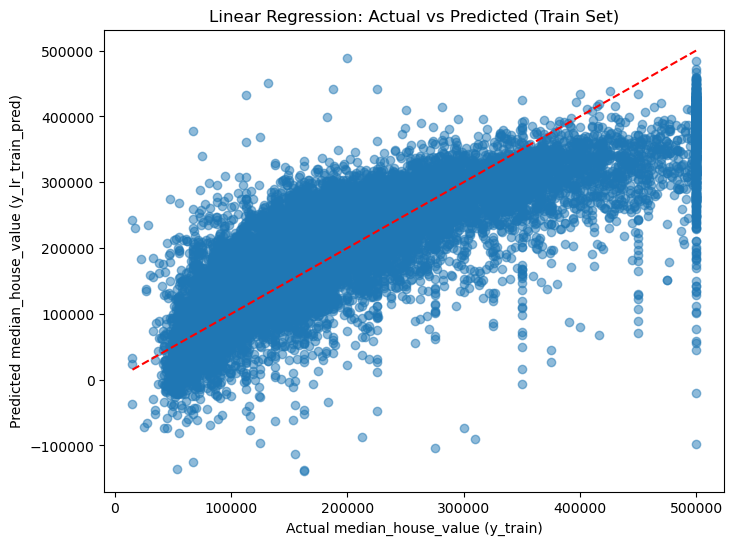

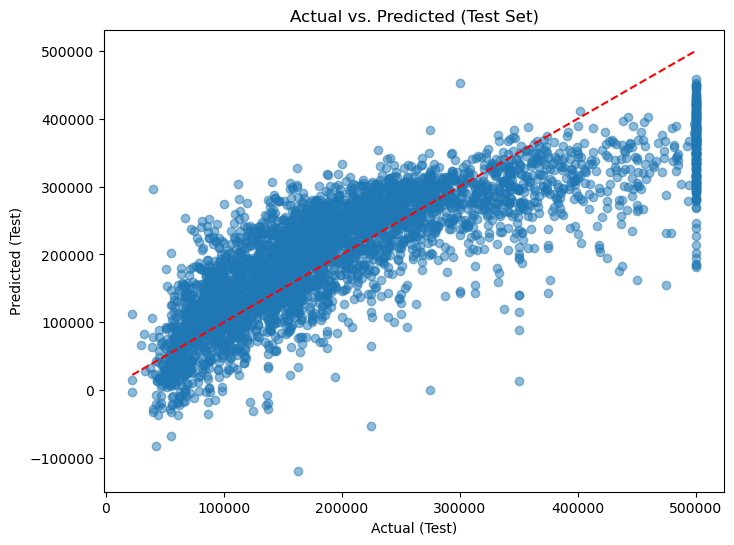

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train.values.ravel(), y_lr_train_pred.ravel(), alpha=0.5)
plt.xlabel('Actual median_house_value (y_train)')
plt.ylabel('Predicted median_house_value (y_lr_train_pred)')
plt.title('Linear Regression: Actual vs Predicted (Train Set)')
plt.plot([y_train.values.min(), y_train.values.max()], [y_train.values.min(), y_train.values.max()], 'r--')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test.values.ravel(), y_lr_test_pred.ravel(), alpha=0.5)
plt.plot([y_test.values.min(), y_test.values.max()], [y_test.values.min(), y_test.values.max()], 'r--')
plt.xlabel("Actual (Test)")
plt.ylabel("Predicted (Test)")
plt.title("Actual vs. Predicted (Test Set)")
plt.show()


##### Evaluation

In [67]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Only 'fit_intercept' is a valid parameter for tuning
param_grid = {'fit_intercept': [True, False]}

grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV MSE:", -grid_search.best_score_)

# Cross-validation scores (R2)
cv_r2_scores = cross_val_score(LinearRegression(), X_train, y_train, cv=5, scoring='r2')
print("Cross-validated R2 scores:", cv_r2_scores)
print("Mean CV R2:", np.mean(cv_r2_scores))

Best parameters: {'fit_intercept': True}
Best CV MSE: 4872082697.235347
Cross-validated R2 scores: [0.64906688 0.64785666 0.62988375 0.6283687  0.60962381]
Mean CV R2: 0.63295995909457


### 2) Random Forest

In [49]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=42)
rf.fit(x_houses,y_houses)

c:\Users\Zainab\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=2, random_state=42)

In [50]:
y_rf_train_pred = rf.predict(X_train) 
y_rf_test_pred = rf.predict(X_test)

In [51]:
from sklearn.metrics import mean_squared_error, r2_score
rf_train_mse = mean_squared_error(y_train,y_rf_train_pred)
rf_train_r2 = r2_score(y_train,y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test,y_rf_test_pred)
rf_test_r2 = r2_score(y_test,y_rf_test_pred)

In [52]:
rf_results = pd.DataFrame({
    'set': ['train', 'test'],
    'MSE': [rf_train_mse, rf_test_mse],
    'R2': [rf_train_r2, rf_test_r2]
})
rf_results

,set,MSE,R2
0,train,6.565468e+09,0.505442
1,test,6.423388e+09,0.523274


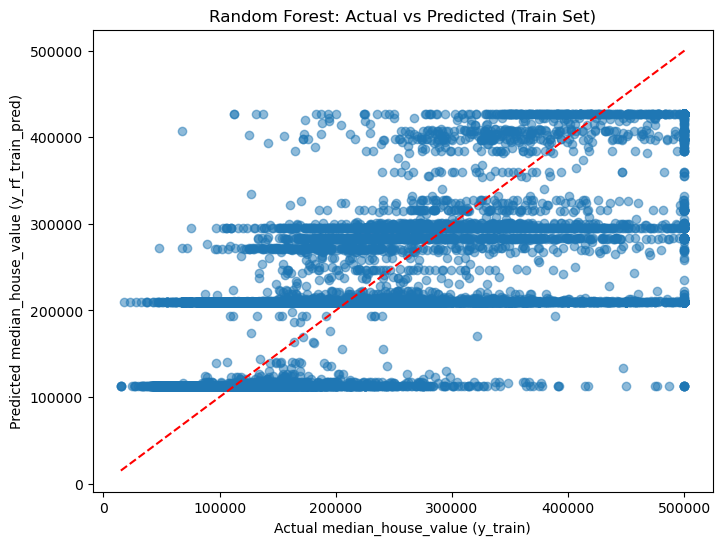

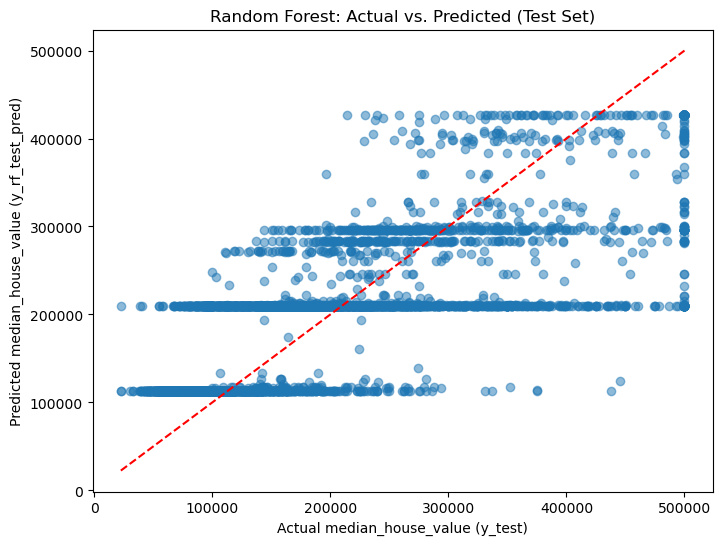

In [53]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train.values.ravel(), y_rf_train_pred.ravel(), alpha=0.5)
plt.xlabel('Actual median_house_value (y_train)')
plt.ylabel('Predicted median_house_value (y_rf_train_pred)')
plt.title('Random Forest: Actual vs Predicted (Train Set)')
plt.plot(
    [y_train.values.min(), y_train.values.max()],
    [y_train.values.min(), y_train.values.max()],
    'r--'
)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test.values.ravel(), y_rf_test_pred.ravel(), alpha=0.5)
plt.plot(
    [y_test.values.min(), y_test.values.max()],
    [y_test.values.min(), y_test.values.max()],
    'r--'
)
plt.xlabel("Actual median_house_value (y_test)")
plt.ylabel("Predicted median_house_value (y_rf_test_pred)")
plt.title("Random Forest: Actual vs. Predicted (Test Set)")
plt.show()

### 3)DecisionTreeRegressor

In [54]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=2, random_state=42)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [55]:
dtr_y_pred = dtr.predict(X_test)
dtr_y_pred

array([209241.9919307 , 209241.9919307 , 112925.20195163, ...,
       112925.20195163, 112925.20195163, 112925.20195163])

In [56]:
dtr.score(X_test,y_test)

0.501934167488463

In [57]:
from sklearn.metrics import mean_squared_error, r2_score

dtr_mse = mean_squared_error(y_test, dtr_y_pred)
dtr_r2 = r2_score(y_test, dtr_y_pred)

print(f"DecisionTreeRegressor Test MSE: {dtr_mse}")
print(f"DecisionTreeRegressor Test R2: {dtr_r2}")

DecisionTreeRegressor Test MSE: 6710925361.174896
DecisionTreeRegressor Test R2: 0.501934167488463


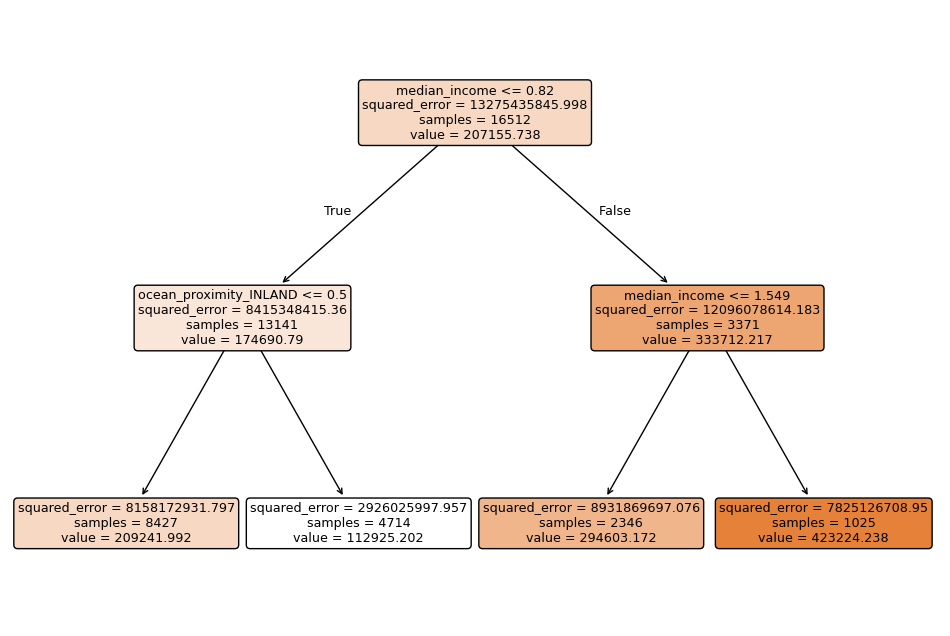

In [58]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(dtr, filled=True, feature_names=x_houses.columns, rounded=True)
plt.show()

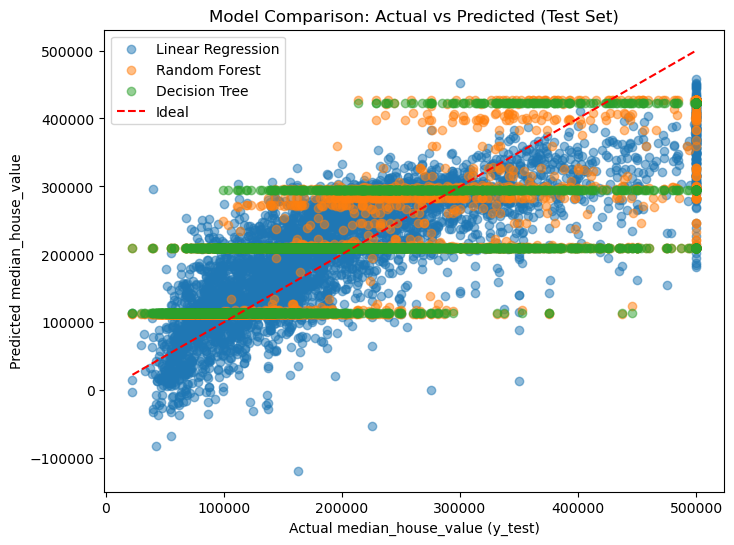

In [59]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test.values.ravel(), y_lr_test_pred.ravel(), alpha=0.5, label='Linear Regression')
plt.scatter(y_test.values.ravel(), y_rf_test_pred.ravel(), alpha=0.5, label='Random Forest')
plt.scatter(y_test.values.ravel(), dtr_y_pred.ravel(), alpha=0.5, label='Decision Tree')
plt.plot([y_test.values.min(), y_test.values.max()], [y_test.values.min(), y_test.values.max()], 'r--', label='Ideal')
plt.xlabel('Actual median_house_value (y_test)')
plt.ylabel('Predicted median_house_value')
plt.title('Model Comparison: Actual vs Predicted (Test Set)')
plt.legend()
plt.show()

#### Checking all the 3 models prediction in a sample data

In [ ]:
houses.head(30)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-1.347646,-1.911134,-1.973713,-1.840690,2.025841,452600.0,0,0,1,0
1,-1.322844,1.043185,-0.607019,1.880639,1.478187,1.144833,1.630366,2.018620,358500.0,0,0,1,0
2,-1.332827,1.038503,1.856182,-0.557746,-1.302320,-1.303908,-1.306521,1.682226,352100.0,0,0,1,0
3,-1.337818,1.038503,1.856182,-0.775804,-0.967548,-1.121186,-0.971326,1.067583,341300.0,0,0,1,0
4,-1.337818,1.038503,1.856182,-0.397706,-0.691381,-1.101843,-0.707002,0.176454,342200.0,0,0,1,0
5,-1.337818,1.038503,1.856182,-1.280635,-1.122396,-1.587915,-1.170328,0.285452,269700.0,0,0,1,0
6,-1.337818,1.033821,1.856182,0.287984,0.188518,-0.076139,0.374456,0.065205,299200.0,0,0,1,0
7,-1.337818,1.033821,1.856182,0.601138,0.725561,0.010808,0.737941,-0.282249,241400.0,0,0,1,0
8,-1.342809,1.033821,1.061601,0.300136,0.674134,0.075223,0.605584,-1.103898,226700.0,0,0,1,0
9,-1.337818,1.033821,1.856182,0.808334,0.770906,0.465983,0.893624,0.084606,261100.0,0,0,1,0


In [60]:
import numpy as np
#159800
# Input features (must be 2D array)
# Input features (must be 2D array, 12 features as in x_houses)
input_sample = np.array([[-1.347800, 1.038503, 1.061601, -0.386345, -0.264561, -0.329995, -0.161625, -1.462233, 0, 0, 1, 0]])  # Shape: (1, 12)

# Predict
prediction = lr.predict(input_sample)
print(f"Predicted house value: ${prediction[0][0]:,.2f}")

Predicted house value: $144,999.49


c:\Users\Zainab\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [61]:
# Predict
prediction = rf.predict(input_sample)
print(f"Predicted house value: ${prediction[0]:,.2f}")


Predicted house value: $209,190.01


c:\Users\Zainab\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [62]:
# Predict
prediction = dtr.predict(input_sample)  # Replace 'model' with your trained model
print(f"Predicted house value: ${prediction[0]:,.2f}")

Predicted house value: $209,241.99


c:\Users\Zainab\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


### 4) Integrating GEMINI for prediction

In [ ]:
# !pip install google-generativeai

In [ ]:
# x_houses.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income'],
      dtype='object')

In [ ]:
# import google.generativeai as genai
# import os
# import re
# from dotenv import load_dotenv
# import time
# import pandas as pd

# # --- Configuration ---
# load_dotenv()
# genai.configure(api_key=os.getenv("GEMINI_KEY"))  # Store API key in .env as GEMINI_KEY=your_key_here
# model = genai.GenerativeModel('gemini-1.5-flash')

# # --- Prediction Function ---
# def predict_with_gemini(features_row):
#     prompt = f"""Predict California house price as ONLY a number using:
#     - Age: {features_row['housing_median_age']}
#     - Rooms: {features_row['total_rooms']}
#     - Bedrooms: {features_row['total_bedrooms']}
#     - Population: {features_row['population']}
#     - Households: {features_row['households']}
#     - Income: {features_row['median_income']}
    
#     Rules:
#     1. Return JUST the number (e.g., 2.75)
#     2. No explanations, code, or formatting
#     3. If unsure, return -1"""
    
#     try:
#         response = model.generate_content(prompt)
#         if match := re.search(r"[-+]?\d*\.\d+|\d+", response.text):
#             return float(match.group())
#         return -1
#     except Exception as e:
#         print(f"Error: {str(e)[:100]}...")
#         return -1

# # --- Execute Predictions ---
# results = []
# sample_data = X_test.head(5)  # Only process 5 rows due to rate limits

# for idx, row in sample_data.iterrows():
#     start_time = time.time()
#     pred = predict_with_gemini(row)
#     elapsed = time.time() - start_time
    
#     results.append({
#         'index': idx,
#         'prediction': pred,
#         'time_sec': round(elapsed, 1)
#     })
#     time.sleep(max(20 - elapsed, 1))  # Maintain 20s interval

# # --- Display Results ---
# results_df = pd.DataFrame(results)
# print("Gemini Predictions:")
# print(results_df[['index', 'prediction']])

# if (results_df['prediction'] == -1).any():
#     print("\nNote: Some predictions failed. Consider:")
#     print("- Verifying API key at https://aistudio.google.com/app/apikey")
#     print("- Reducing sample size further")
#     print("- Using traditional ML models for better accuracy")

Error: 429 Quota exceeded for quota metric 'Generate Content API requests per minute' and limit 'GenerateCo...
Error: 429 Quota exceeded for quota metric 'Generate Content API requests per minute' and limit 'GenerateCo...
Error: 429 Quota exceeded for quota metric 'Generate Content API requests per minute' and limit 'GenerateCo...
Error: 429 Quota exceeded for quota metric 'Generate Content API requests per minute' and limit 'GenerateCo...
Error: 429 Quota exceeded for quota metric 'Generate Content API requests per minute' and limit 'GenerateCo...
Gemini Predictions:
   index  prediction
0   8151          -1
1     53          -1
2   3039          -1
3   9484          -1
4   9307          -1

Note: Some predictions failed. Consider:
- Verifying API key at https://aistudio.google.com/app/apikey
- Reducing sample size further
- Using traditional ML models for better accuracy


In [ ]:
# import google.generativeai as genai
# import os
# import re
# from dotenv import load_dotenv
# import time
# import pandas as pd
# import math

# # --- Configuration ---
# load_dotenv()
# genai.configure(api_key=os.getenv("GEMINI_KEY"))
# model = genai.GenerativeModel('gemini-1.5-flash')

# # --- Enhanced Prediction Function ---
# def predict_with_gemini(features_row, max_retries=3):
#     prompt = f"""Predict California house price as ONLY a number using:
#     - Age: {features_row['housing_median_age']} years
#     - Rooms: {features_row['total_rooms']}
#     - Bedrooms: {features_row['total_bedrooms']}
#     - Population: {features_row['population']}
#     - Households: {features_row['households']}
#     - Income: ${features_row['median_income']*10000:,.0f} yearly
    
#     Rules:
#     1. Return JUST the predicted price (e.g., 250000)
#     2. No explanations or formatting
#     3. If unsure, return -1"""
    
#     for attempt in range(max_retries):
#         try:
#             response = model.generate_content(prompt)
#             if match := re.search(r'\d{3,}', response.text):  # Match prices > $100
#                 return float(match.group())
#             return -1
#         except Exception as e:
#             if "quota" in str(e).lower():
#                 wait = min(math.pow(2, attempt) * 10, 60)  # Exponential backoff, max 60s
#                 print(f"Quota exceeded. Waiting {wait:.0f}s (attempt {attempt+1})...")
#                 time.sleep(wait)
#                 continue
#             print(f"Error: {str(e)[:100]}...")
#             return -1
#     return -1

# # --- Quota-Aware Execution ---
# def safe_predict(data, max_rows=3, min_delay=30):
#     results = []
#     for idx, row in data.head(max_rows).iterrows():
#         start = time.time()
#         pred = predict_with_gemini(row)
#         elapsed = time.time() - start
        
#         results.append({
#             'index': idx,
#             'prediction': pred,
#             'processing_time': f"{elapsed:.1f}s"
#         })
        
#         remaining_delay = max(0, min_delay - elapsed)
#         time.sleep(remaining_delay)
        
#         # Fixed print statement
#         if pred != -1:
#             print(f"Row {idx}: ${pred:,.0f} (took {elapsed:.1f}s)")
#         else:
#             print(f"Row {idx}: FAILED (took {elapsed:.1f}s)")
    
#     return pd.DataFrame(results)

# # --- Run Predictions ---
# print("Starting Gemini predictions (strict quota management)...")
# predictions_df = safe_predict(X_test)

# print("\nFinal Results:")
# print(predictions_df[['index', 'prediction']])

# if len(predictions_df[predictions_df['prediction'] == -1]) > 0:
#     print("\nRecommendations:")
#     print("1. Upgrade to paid Gemini API for higher quotas")
#     print("2. Use traditional ML (RandomForest) for bulk predictions")
#     print("3. Try again after 1 minute (free tier resets)")

Starting Gemini predictions (strict quota management)...
Quota exceeded. Waiting 10s (attempt 1)...
Quota exceeded. Waiting 20s (attempt 2)...
Quota exceeded. Waiting 40s (attempt 3)...
Row 8151: FAILED (took 71.5s)
Quota exceeded. Waiting 10s (attempt 1)...
Quota exceeded. Waiting 20s (attempt 2)...
Quota exceeded. Waiting 40s (attempt 3)...
Row 53: FAILED (took 70.5s)
Quota exceeded. Waiting 10s (attempt 1)...
Quota exceeded. Waiting 20s (attempt 2)...
Quota exceeded. Waiting 40s (attempt 3)...
Row 3039: FAILED (took 70.5s)

Final Results:
   index  prediction
0   8151          -1
1     53          -1
2   3039          -1

Recommendations:
1. Upgrade to paid Gemini API for higher quotas
2. Use traditional ML (RandomForest) for bulk predictions
3. Try again after 1 minute (free tier resets)


In [ ]:
# import google.generativeai as genai
# import os
# import time
# from dotenv import load_dotenv

# load_dotenv()
# genai.configure(api_key=os.getenv("GEMINI_KEY"))
# model = genai.GenerativeModel('gemini-1.5-flash')

# def predict_with_gemini(features_row):
#     prompt = f"""Predict house price as ONLY a number using:
#     - Age: {features_row['housing_median_age']}
#     - Income: {features_row['median_income']}
#     - Rooms: {features_row['total_rooms']}
#     Return JUST the number (e.g., 250000)"""
    
#     try:
#         time.sleep(60)  # Mandatory 60s delay between calls
#         response = model.generate_content(prompt)
#         return float(response.text.strip()) if response.text.strip().isdigit() else -1
#     except:
#         return -1

# # Process just 1 prediction per minute
# result = predict_with_gemini(X_test.iloc[0])
# print(f"Prediction: {result if result != -1 else 'Failed'}")

Prediction: Failed


In [ ]:
# import openai
# from openai import OpenAI
# import os
# import re
# from dotenv import load_dotenv
# import time
# import pandas as pd

# # --- Configuration ---
# load_dotenv()
# client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))  # Store in .env as OPENAI_API_KEY=sk-your-key-here
# MODEL_NAME = "gpt-3.5-turbo"  # or "gpt-4" for better accuracy

# # --- Prediction Function ---
# def predict_with_openai(features_row):
#     prompt = f"""Predict California house price as ONLY a number using:
#     - Age: {features_row['housing_median_age']}
#     - Rooms: {features_row['total_rooms']}
#     - Bedrooms: {features_row['total_bedrooms']}
#     - Population: {features_row['population']}
#     - Households: {features_row['households']}
#     - Income: {features_row['median_income']}
    
#     Rules:
#     1. Return JUST the number (e.g., 250000)
#     2. No explanations, code, or formatting
#     3. If unsure, return -1"""
    
#     try:
#         response = client.chat.completions.create(
#             model=MODEL_NAME,
#             messages=[{"role": "user", "content": prompt}],
#             temperature=0.0  # For deterministic output
#         )
#         if match := re.search(r"\d{3,}", response.choices[0].message.content):
#             return float(match.group())
#         return -1
#     except Exception as e:
#         print(f"Error: {str(e)[:100]}...")
#         return -1

# # --- Execute Predictions ---
# results = []
# sample_data = X_test.head(5)  # Process 5 rows

# for idx, row in sample_data.iterrows():
#     start_time = time.time()
#     pred = predict_with_openai(row)
#     elapsed = time.time() - start_time
    
#     results.append({
#         'index': idx,
#         'prediction': pred,
#         'time_sec': round(elapsed, 1)
#     })
#     time.sleep(max(3 - elapsed, 1))  # 3s delay between requests (OpenAI has higher limits)

# # --- Display Results ---
# results_df = pd.DataFrame(results)
# print("OpenAI Predictions:")
# print(results_df[['index', 'prediction']])

# if (results_df['prediction'] == -1).any():
#     print("\nNote: Some predictions failed. Consider:")
#     print("- Verifying API key at https://platform.openai.com/api-keys")
#     print("- Checking usage limits at https://platform.openai.com/usage")
#     print("- Using gpt-4 model for better accuracy")

Error: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and...
Error: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and...
Error: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and...
Error: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and...
Error: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and...
OpenAI Predictions:
   index  prediction
0   8151          -1
1     53          -1
2   3039          -1
3   9484          -1
4   9307          -1

Note: Some predictions failed. Consider:
- Verifying API key at https://platform.openai.com/api-keys
- Checking usage limits at https://platform.openai.com/usage
- Using gpt-4 model for better accuracy
